# Model Compression using Knowledge Distillation

Knowledge distillation in machine learning is a process where a smaller, simpler "student" model is trained to replicate the behavior of a larger, more complex "teacher" model. This technique is often used to create efficient models that can operate in environments with limited computational resources, such as mobile devices, while still benefiting from the knowledge captured by larger models.

To demonstrate this concept, I'll will use TensorFlow to perform knowledge distillation. We'll use a default dataset, such as the MNIST dataset of handwritten digits.

The notebook will include the following key components:

1. **Introduction to Knowledge Distillation:** Brief explanation of the concept and its use cases.
2. **Setting Up the Environment:** Importing necessary libraries and preparing the TensorFlow environment.
3. **Loading and Preprocessing Data:** How to load the MNIST dataset and preprocess it for model training.
4. **Building the Teacher Model:** Creating a larger, complex model that will act as the teacher.
5. **Training the Teacher Model:** Training the teacher model on the MNIST dataset.
6. **Building the Student Model:** Creating a smaller, simpler model that will act as the student.
7. **Knowledge Distillation Process:** Implementing the knowledge distillation process, where the student model learns from the teacher model.
8. **Evaluating the Models:** Comparing the performance of the teacher and student models.
9. **Conclusion:** Summarizing what we've learned and potential applications.

In [33]:
# Import necessary Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
#Loading and Preprocessing Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

11490434/11490434 [==============================] - 1s 0us/step


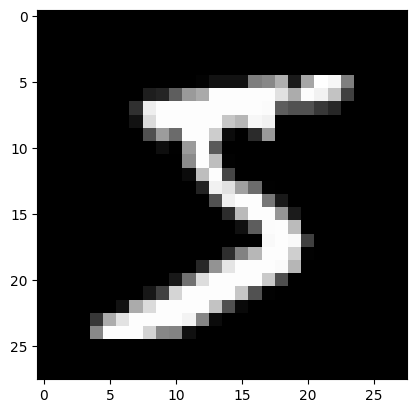

In [6]:
# train_images is your dataset. Let's view the first image
image = train_images[0]

# Use matplotlib to display the image
plt.imshow(image, cmap='gray')
plt.show()

In [7]:
# The image is labelled as 5
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

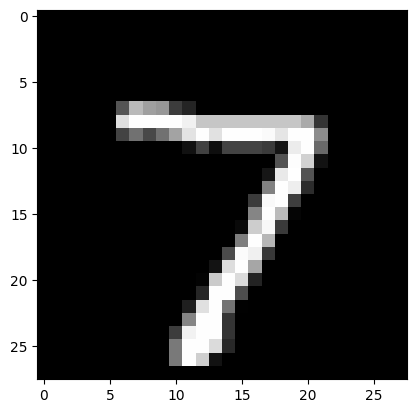

In [8]:
# train_images is your dataset. Let's view the first image
image = test_images[0]

# Use matplotlib to display the image
plt.imshow(image, cmap='gray')
plt.show()

In [9]:
# the image is labelled as 7
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [10]:
# Building the Teacher Model
teacher_input = Input(shape=(28, 28))
x = Flatten()(teacher_input)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
teacher_output = Dense(10, activation='softmax')(x)
teacher_model = Model(teacher_input, teacher_output)


Here, a more complex model is defined to act as the teacher.

This complex teacher model is a simple but effective neural network for image classification tasks. It starts with a flattening layer to convert 2D image data into a 1D array, followed by a dense layer to learn features, a dropout layer to reduce overfitting, and finally, an output layer to classify the images into one of the ten classes. 

Let's breakdown the architecture.

1. The shape=(28, 28) argument specifies that each input image has a shape of 28x28 pixels. This layer doesn't process the data; it just defines the input shape.
2. The Flatten layer transforms the 2D 28x28 pixel input images into a 1D array. This step is necessary because the next layer, a dense layer, requires a 1D input. So, the 28x28 image, which is 784 pixels in total, becomes a flat array of 784 elements.
3. Dense Layer is a fully connected (Dense) layer with 128 neurons. Each neuron in this layer is connected to all 784 inputs. The activation='relu' argument means that the Rectified Linear Unit (ReLU) activation function is used. ReLU is a common activation function in neural networks, especially in hidden layers, because it helps the model learn non-linear relationships in the data.
4. The Dropout layer randomly sets a fraction (20% in this case, as indicated by 0.2) of the input units to 0 at each update during training. This helps prevent overfitting by reducing the model's reliance on any specific set of neurons and promoting generalization.
5. Output Layer is another fully connected (Dense) layer, but it serves as the output layer of the network. It has 10 neurons, corresponding to the 10 possible classes (digits 0-9) in the MNIST dataset. The softmax activation function is used to generate a probability distribution over the 10 classes, making it suitable for multi-class classification.
6. `Model(teacher_input, teacher_output)`creates the actual model by specifying the input and output layers. In TensorFlow/Keras, this defines the flow of data from teacher_input to teacher_output, including all the layers in between.

### Training the Teacher Model

In [28]:
#This code compiles and trains the teacher model.
teacher_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
teacher_model.fit(train_images, train_labels, epochs=3, batch_size=32, validation_split=0.1)

# Evaluate the teacher model on the test dataset
initial_teacher_loss, initial_teacher_accuracy = teacher_model.evaluate(test_images, test_labels)
print("Initial Teacher Model Accuracy:", initial_teacher_accuracy)

Epoch 1/3
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0433 - accuracy: 0.9851 - val_loss: 0.0619 - val_accuracy: 0.9832
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0397 - accuracy: 0.9871 - val_loss: 0.0721 - val_accuracy: 0.9810
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0785 - accuracy: 0.9807
Initial Teacher Model Accuracy: 0.9807000160217285


The complex teacher model gives us an **accuracy of 98%**

### Building the Student Model

First, let's build an evaluate a simple Student Model without distillation.

In [23]:
# a simpler model is defined as the student
student_input = Input(shape=(28, 28))
y = Flatten()(student_input)
y = Dense(32, activation='relu')(y)  # Smaller model than the teacher
student_output = Dense(10, activation='softmax')(y)
student_model = Model(student_input, student_output)


In [24]:
# Compile the student model
student_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the student model on the original labels (not the teacher's predictions)
student_model.fit(train_images, train_labels, epochs=3, batch_size=32, validation_split=0.1)

# Evaluate the student model on the test dataset
initial_student_loss, initial_student_accuracy = student_model.evaluate(test_images, test_labels)
print("Initial Student Model Accuracy:", initial_student_accuracy)


Epoch 1/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3746 - accuracy: 0.8946 - val_loss: 0.1912 - val_accuracy: 0.9463
Epoch 2/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2021 - accuracy: 0.9419 - val_loss: 0.1509 - val_accuracy: 0.9575
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1470 - accuracy: 0.9570
Initial Student Model Accuracy: 0.9570000171661377


A simple student model gives us an **accuracy of 95.7%**

Next, we perform **knowledge distillation.** This involves training the student model not on the original labels, but on the predictions (soft targets) made by the teacher model on the training data. This way, the student model learns to approximate the output of the teacher model.

In [26]:
# Get teacher model's predictions (soft targets)
teacher_predictions = teacher_model.predict(train_images)

# Train the student model on these soft targets
student_model.fit(train_images, teacher_predictions, epochs=3, batch_size=32, validation_split=0.1)

# Evaluate the student model on the test dataset after distillation
final_student_loss, final_student_accuracy = student_model.evaluate(test_images, test_labels)
print("Final Student Model Accuracy:", final_student_accuracy)

1875/1875 [==============================] - 5s 2ms/step
Epoch 1/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0993 - accuracy: 0.9748 - val_loss: 0.1012 - val_accuracy: 0.9738
Epoch 2/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0922 - accuracy: 0.9768 - val_loss: 0.0918 - val_accuracy: 0.9773
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1175 - accuracy: 0.9661
Final Student Model Accuracy: 0.9660999774932861


A  student model gives us an **accuracy of 96.6%**

Note: The effectiveness of knowledge distillation can vary based on several factors, including the complexity of the teacher model, the architecture of the student model, and the nature of the dataset.

### Result: With a simple student model with knowledge distillation we have an accuracy closer to the accuracy from a more complex teacher model.

So, how does using teacher model predictions over true lables while training the student model, make the student model better?

**Soft Targets Provide More Information:** The teacher model's predictions, or "soft targets," carry more information than hard labels (true labels). For instance, in a classification task, instead of just knowing the correct class (hard label), soft targets provide probabilities across all classes. This richer information can help the student model learn finer distinctions between classes. For example, if an image of a "7" slightly resembles a "1", the teacher's probabilities might be something like 90% for "7" and 10% for "1". This helps the student understand this nuance, which is lost in hard labels.

If you look at the `teacher_predictions[0]`, they are probability numbers. For e.g.

In [32]:
# We know this image is of number 5
teacher_predictions[0]

array([5.5558512e-18, 1.0781441e-11, 2.4353049e-11, 3.7190234e-04,
       2.0432859e-23, 9.9962807e-01, 7.9194312e-21, 2.9984012e-12,
       4.8518077e-15, 1.4713636e-09], dtype=float32)

Each number corresponds to the model's predicted probability that the sample belongs to one of the possible classes. In the context of the MNIST dataset, which involves digit classification, these classes are digits from 0 to 9.

* 5.5558512e-18: The probability that the image is a "0"
* 1.0781441e-11: The probability that the image is a "1"
* 2.4353049e-11: The probability that the image is a "2"
* 3.7190234e-04: The probability that the image is a "3"
* 2.0432859e-23: The probability that the image is a "4"
* 9.9962807e-01: The probability that the image is a "5"
* 7.9194312e-21: The probability that the image is a "6"
* 2.9984012e-12: The probability that the image is a "7"
* 4.8518077e-15: The probability that the image is a "8"
* 1.4713636e-09: The probability that the image is a "9"

These probabilities are the result of the softmax function in the output layer of the neural network, which normalizes the output of the final layer into a probability distribution. The values are close to 0 for most classes, indicating low probability, and one value is significantly higher, suggesting the model is much more confident about that particular class.

In this case, the highest probability (9.9962807e-01 or approximately 99.96%) is associated with the class 5. This means that, according to the teacher model, this image is almost certainly a 5.

Knowledge distillation leverages these probabilities. Instead of using hard labels (0 or 1 for each class), the student model is trained to mimic this probability distribution, which can help it learn more nuanced features of the data.